In [21]:
print("Hello MJF1A")

Hello MJF1A


   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.495592 -0.906945 -0.336843                0     0        0
1     1 -9.488013 -0.899195 -0.337950                0     0        0
2     2 -9.492908 -0.904170 -0.343041                0     0        0
3     3 -9.501896 -0.906277 -0.338515                0     0        0
4     4 -9.495207 -0.911066 -0.343226                0     0        0
Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')
(9155, 7)
Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64
              AccV        AccML        AccAP
count  9155.000000  9155.000000  9155.000000
mean     -8.666016    -2.034959     3.391814
std       0.751485     0.978314     1.362046
min     -13.304783    -5.179975    -3.439340
25%      -9.143692    -2.779128     3.173248
50%      -8.644827    -2.163564     3.602073

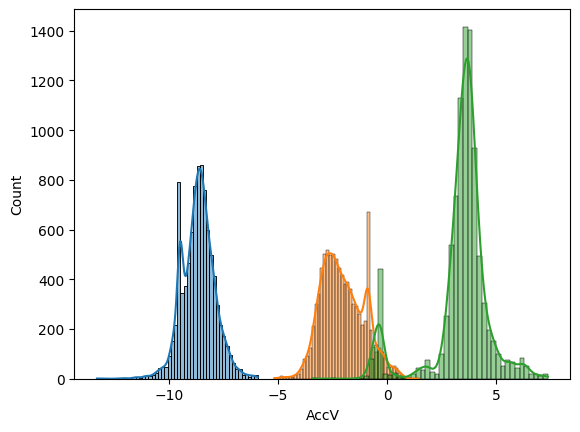

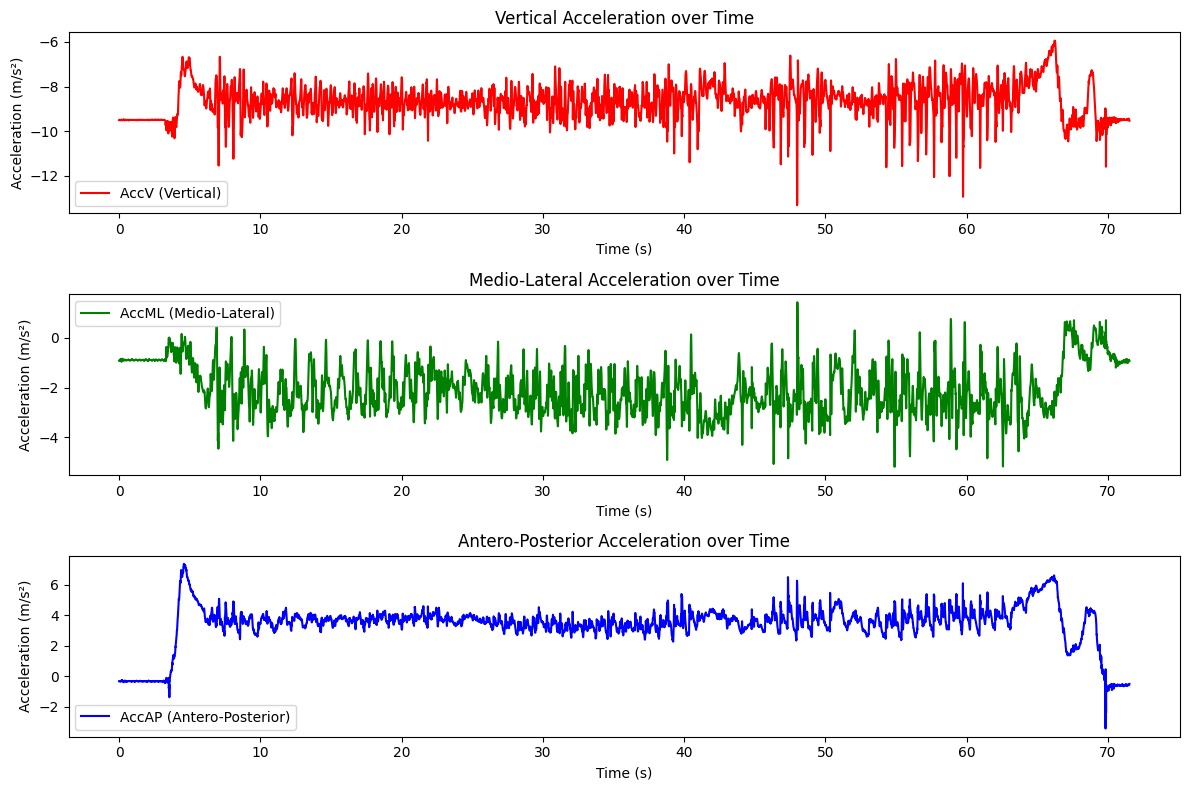

   time_seconds      AccV     AccML     AccAP  Magnitude
0      0.000000 -9.495592 -0.906945 -0.336843   9.544752
1      0.007812 -9.488013 -0.899195 -0.337950   9.536516
2      0.015625 -9.492908 -0.904170 -0.343041   9.542039
3      0.023438 -9.501896 -0.906277 -0.338515   9.551019
4      0.031250 -9.495207 -0.911066 -0.343226   9.544989
StartHesitation      0
Turn               448
Walking              0
dtype: int64


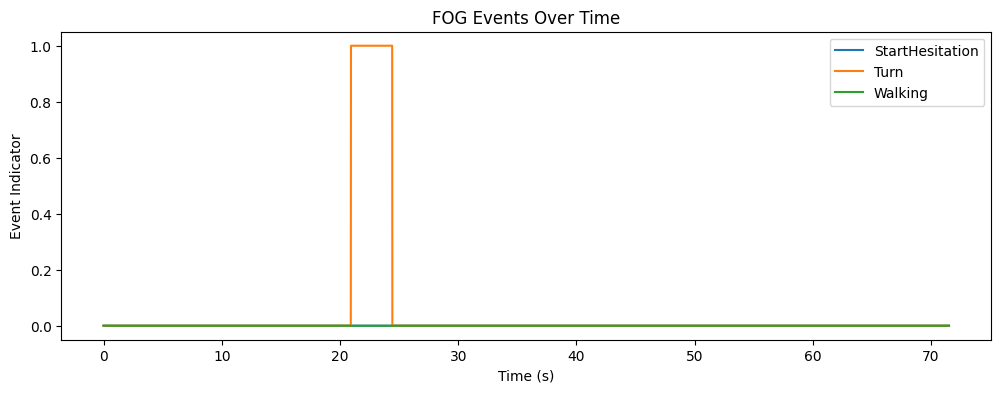

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_PATH = r"C:\Users\ramya\Downloads\tlvmc-parkinsons-freezing-gait-prediction (1)\train\tdcsfog\0a89f859b5.csv"  #replace with file 
df = pd.read_csv(DATASET_PATH)

#plot acceleration, accelerometer data, time should be in seconds 
def plot_acceleration_data(time, x, y, z):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(time, x, label='AccV (Vertical)', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s²)')
    plt.title('Vertical Acceleration over Time')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(time, y, label='AccML (Medio-Lateral)', color='g')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s²)')
    plt.title('Medio-Lateral Acceleration over Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(time, z, label='AccAP (Antero-Posterior)', color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s²)')
    plt.title('Antero-Posterior Acceleration over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

#calculate magnitude of acceleration
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

#function to see the occurance of events over time 
def plot_event_occurrences(time, events, event_names):
    event_cols = ['StartHesitation','Turn','Walking']
    print(df[event_cols].sum())

    plt.figure(figsize=(12,4))
    for col in event_cols:
        plt.plot(df['time_seconds'], df[col], label=col)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Event Indicator')
    plt.title('FOG Events Over Time')
    plt.show()

def main():
    print(df.head())
    print(df.columns)
    print(df.shape)
    print(df.isnull().sum())
    print(df[['AccV','AccML','AccAP']].describe())

    #plot histographs 
    sns.histplot(df['AccV'], bins=50, kde=True)
    sns.histplot(df['AccML'], bins=50, kde=True)
    sns.histplot(df['AccAP'], bins=50, kde=True)
    plt.show()


    #convert timestep to seconds
    sampling_rate = 128  #hertz
    df['time_seconds'] = df['Time'] / sampling_rate

    #acceleration plot function
    plot_acceleration_data(df['time_seconds'], df['AccV'], df['AccML'], df['AccAP'])

    #calculate magnitude and add as new column
    df['Magnitude'] = calculate_magnitude(df['AccV'], df['AccML'], df['AccAP'])
    print(df[['time_seconds', 'AccV', 'AccML', 'AccAP', 'Magnitude']].head())

    #plot event occurrences over time 
    plot_event_occurrences(df['time_seconds'], df[['StartHesitation','Turn','Walking']], ['StartHesitation','Turn','Walking'])

if __name__ == "__main__":
    main()
